# Business Understanding

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. The good news is that many fewer Americans die of stroke now than in the past. Effective treatments can also help prevent disability from stroke.

This project for understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some features using ML technics. There are several myths about stroke.  We will test the validity of a few of them:

1. “Is stroke only old people’s problem?”
2. “People living in the city are at high risk of stroke?”
3. “Smokers are more prone to stroke?”

# Data Understanding

#### Stroke Prediction Dataset

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:

1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br><br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

# Load Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load Data

In [6]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 12)

In [9]:
# All unique values and value counts of every column.
for column in df.columns:
    print("\n" + column)
    print(df[column].value_counts())


id
16380    1
58061    1
69918    1
23238    1
4807     1
        ..
35085    1
44375    1
5464     1
50522    1
49152    1
Name: id, Length: 5110, dtype: int64

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

hypertension
0    4612
1     498
Name: hypertension, dtype: int64

heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

avg_glucose_level
93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50   

# Prepare Data

In [10]:
# Is there any null values?
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# 'bmi' column has 201 nan values. 
# This is not too much, so we will drop this rows
# Drop null rows by 'bmi' column
df = df.dropna()

In [12]:
# Drop 'id' column
df = df.drop('id', axis=1)

# Round 'age' column and convert data type to integer
df.age = df.age.round().astype('int')

# Drop 'Other' gendered individuals for simplify the mathematical compuations. Because only one patient has 'other'
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)

# Exploratory Data Analysis -EDA

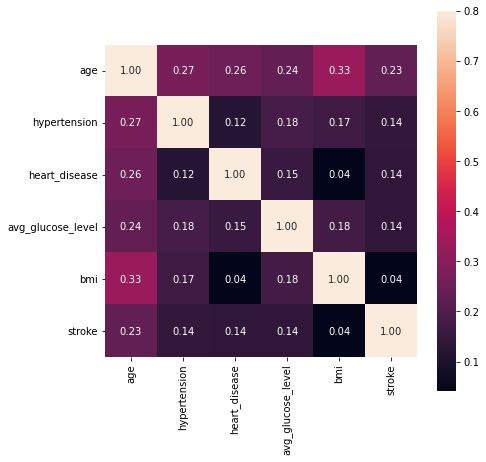

In [13]:
# Correlation of values with each other
correlation = df.corr()
fig, axes = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

0    4699
1     209
Name: stroke, dtype: int64

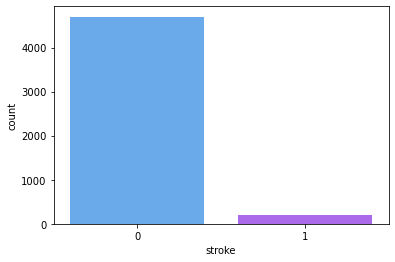

In [14]:
# Visualize stroke distribution
sns.countplot(x='stroke', data=df, palette='cool')
df.stroke.value_counts()

In [15]:
# ratio of stroke positive and stroke negative patient counts:
print("Stroke positive patient ratio: " + str(df.stroke.value_counts()[1]/len(df)))
print("Stroke negative patient ratio: " + str(df.stroke.value_counts()[0]/len(df)))

Stroke positive patient ratio: 0.04258353708231459
Stroke negative patient ratio: 0.9574164629176855


C:\Users\TCSYAYLI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


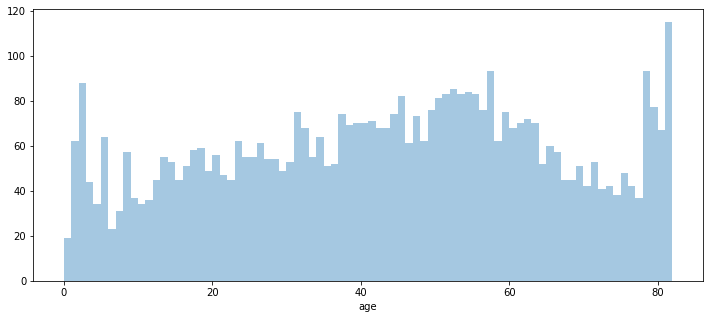

In [16]:
# Visualize age distribution
plt.figure(figsize=(12,5))
sns.distplot(df['age'], bins=max(df['age']), kde=False);

Age distribution of data is balanced.

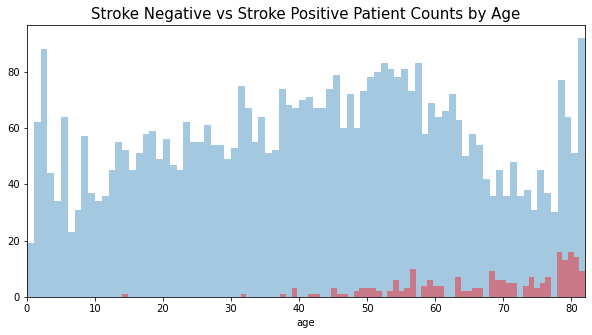

In [17]:
# Visualize age and stroke correlation.
plt.figure(figsize=(10, 5))

sns.distplot(df[df['stroke'] == 0]["age"], bins=max(df['age']), kde=False)
sns.distplot(df[df['stroke'] == 1]["age"], bins=max(df['age']), color='red', kde=False)

plt.title('Stroke Negative vs Stroke Positive Patient Counts by Age', fontsize=15)
plt.xlim([min(df['age']),max(df['age'])])
plt.show()

According to above plot, we have balanced age distribution in stroke negative group. But stroke positive patients are stacked to the left.

Let's look age ratio distribution in each groups:

C:\Users\TCSYAYLI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


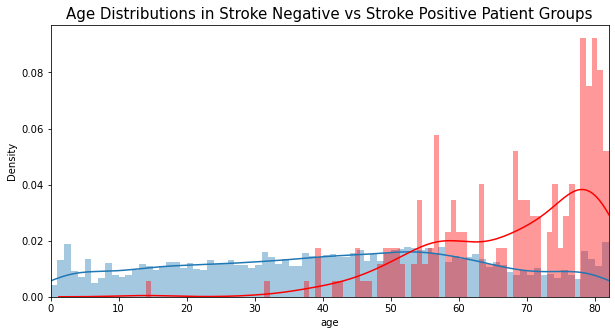

In [18]:
# Visualize age and stroke correlation
plt.figure(figsize=(10, 5))

sns.distplot(df[df['stroke'] == 0]["age"], bins=max(df['age']), kde=True)
sns.distplot(df[df['stroke'] == 1]["age"], bins=max(df['age']), color='red', kde=True)

plt.title('Age Distributions in Stroke Negative vs Stroke Positive Patient Groups', fontsize=15)
plt.xlim([min(df['age']),max(df['age'])])
plt.show()

**Answer of Question 1:**

We can say that stroke ratio in age groups, elder people are more prone to stroke. But even a teenager can have a stroke. So, age has a direct impact on stroke but being young doesn’t mean you won’t have a stroke.

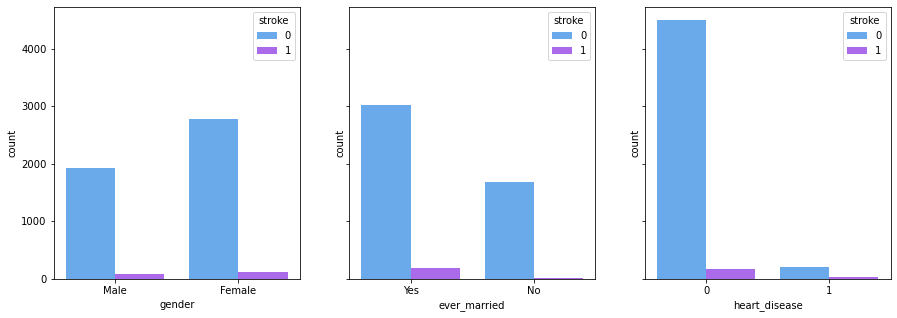

In [19]:
# Data distributions
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='gender', data=df, hue='stroke', ax=ax1, palette='cool');
sns.countplot(x='ever_married', data=df, hue='stroke', ax=ax2, palette='cool');
sns.countplot(x='heart_disease', data=df, hue='stroke', ax=ax3, palette='cool');
fig.set_figwidth(15)
fig.set_figheight(5)

The rate of stroke is higher in married people, but this may be a result of bias.

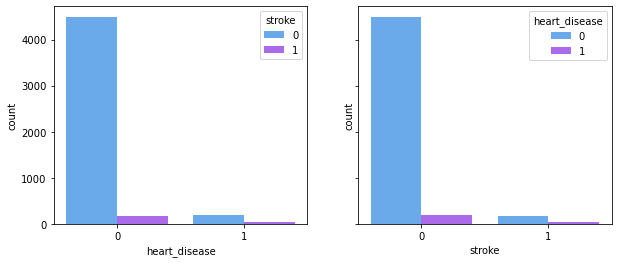

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='heart_disease', data=df, hue='stroke', ax=ax1, palette='cool')
sns.countplot(x='stroke', data=df, hue='heart_disease', ax=ax2, palette='cool')
fig.set_figwidth(10)
fig.set_figheight(4)

Stroke and heart disesase surprisingly negative correlated.

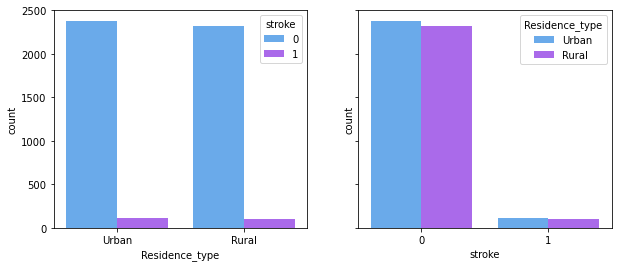

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='Residence_type', data=df, hue='stroke', ax=ax1, palette='cool')
sns.countplot(x='stroke', data=df, hue='Residence_type', ax=ax2, palette='cool')
fig.set_figwidth(10)
fig.set_figheight(4)

**Answer of Question 2:**

First plot shows that the numbers and rates of stroke and non-stroke patients are very similar in both localization types.
The second plot also supports this.

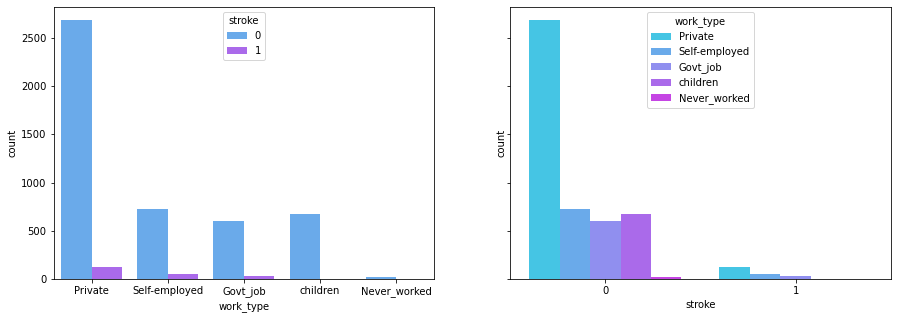

In [22]:
# Work type and stroke relationship
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='work_type', data=df, hue='stroke', ax=ax1, palette='cool')
sns.countplot(x='stroke', data=df, hue='work_type', ax=ax2, palette='cool')
fig.set_figwidth(15)
fig.set_figheight(5)

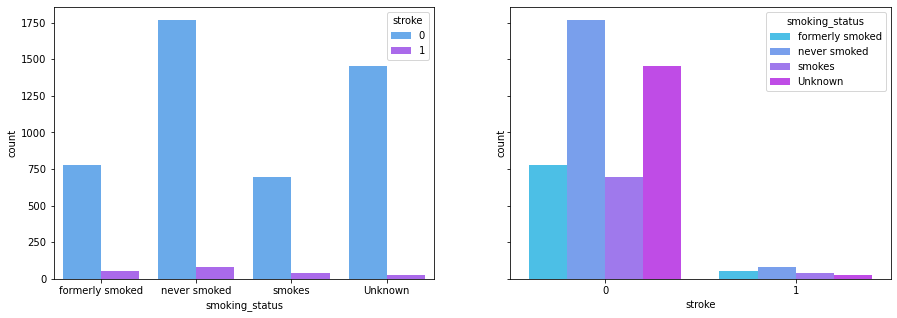

In [23]:
# Smoking status and stroke relationship
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='smoking_status', data=df, hue='stroke', ax=ax1, palette='cool')
sns.countplot(x='stroke', data=df, hue='smoking_status', ax=ax2, palette='cool')
fig.set_figwidth(15)
fig.set_figheight(5)

**Answer of Question 3:**
    
In the non-stroke patient group; the most common smoking status is never smoked, followed by formerly smoked and smokers. This is an expected result. But the situation of smokers is not at all as expected.
According to data of smokers, most common pattern in the stroke group is non-smokers. Strange but true. This may be due to other factors affecting stroke and a biased assessment.

In [24]:
stroke_df = df[df["stroke"] == 1]

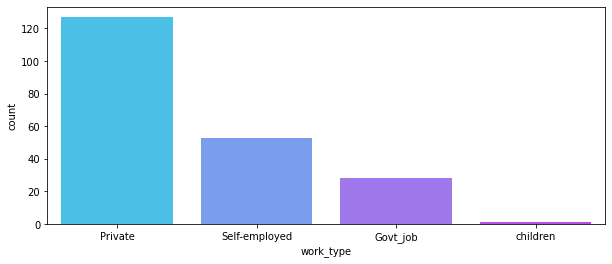

In [25]:
#Work type distribution in stroke patients
plt.figure(figsize=(10,4))
sns.countplot(data=stroke_df,x='work_type', palette='cool');

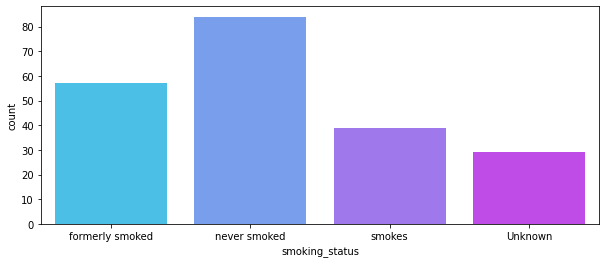

In [26]:
#Smoking status distribution in stroke patients
plt.figure(figsize=(10,4))
sns.countplot(data=stroke_df,x='smoking_status',palette='cool');

According to data of smokers, most common pattern in stroke group is non-smokers. Strange but true. This may be due to other factors affecting stroke and a biased assesment.

# Data Preprocessing for Machine Learning

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [28]:
# One-hot encode 'work_type','Residence_type', 'smoking_status' columns
df = pd.get_dummies(df, columns=["work_type", "smoking_status"], prefix=["work_type", "smoking_status"])

# Convert 'gender' column to boolean
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

# Convert 'ever_married' column to boolean
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# Encode "Residence_type" column to boolean
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


In [30]:
# Scaling the variance in features

std=StandardScaler()

columns = ['age','avg_glucose_level','bmi']
scaled = std.fit_transform(df[['age','avg_glucose_level','bmi']])
scaled = pd.DataFrame(scaled, columns=columns, index= df.index.values)

df2=df.drop(columns=columns,axis=1)
df2=df2.merge(scaled, left_index=True, right_index=True, how = "left")
df2

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1.069941,2.777797,0.981145
2,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1.646347,0.014016,0.459086
3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0.271842,1.484266,0.701016
4,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1.602008,1.549325,-0.623231
5,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1.690685,1.821493,0.013426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,-1.324357,-0.049918,-1.310821
5106,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1.690685,0.448045,1.414072
5107,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.348902,-0.502181,0.217156
5108,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.360520,1.373057,-0.419501


In [31]:
X = df.loc[:, df.columns != 'stroke']
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modeling

In [33]:
def report(y_test, y_pred):
    """
    Creates confusion matrix and classification report
    
    Args:
    y_test: splitted test dataframe labels
    y_pred: predictions for test dataframe
    
    Returns:
    None
    """
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,fmt='d',cmap="flare");

    print(classification_report(y_test,y_pred))

### 1. Adaboost Classification

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       929
           1       0.12      0.19      0.15        53

    accuracy                           0.88       982
   macro avg       0.54      0.56      0.54       982
weighted avg       0.91      0.88      0.90       982



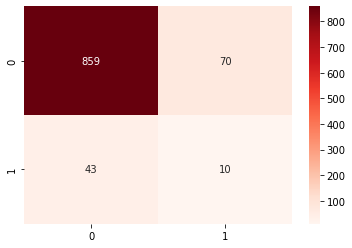

In [34]:
from sklearn.ensemble import AdaBoostClassifier

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(X_train, y_train)

#make prediction using the test set
y_pred= ab_clf.predict(X_test)

#score
ab_clf_score = ab_clf.score(X_test, y_test)


score = cross_val_score(ab_clf, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print ('Train score of AdaBoostClassifier is', score.mean(),'%')
# print ('--')
# print ('Precision score is ', precision)
# print ('--')
# print ('ROC Score is', roc)
# print ('--')
# print ('Recall Score is ', recall)
sns.heatmap(cm, annot=True,fmt='d',cmap="Reds");

print(classification_report(y_test,y_pred))

### 2. XGboost

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       929
           1       0.12      0.15      0.13        53

    accuracy                           0.89       982
   macro avg       0.53      0.54      0.54       982
weighted avg       0.91      0.89      0.90       982



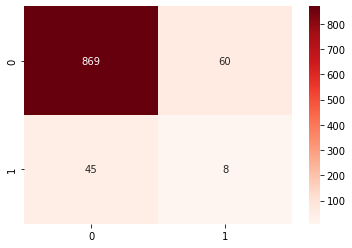

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

#create xgboost classification obj
xgboost_clf = GradientBoostingClassifier(random_state=0)

#training via xgboost classficiation model
xgboost_clf.fit(X_train, y_train)

#make prediction using the test set
y_pred= xgboost_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap="Reds");

print(classification_report(y_test,y_pred))

### 3. SVM

              precision    recall  f1-score   support

           0       0.96      0.64      0.77       929
           1       0.08      0.55      0.14        53

    accuracy                           0.64       982
   macro avg       0.52      0.59      0.46       982
weighted avg       0.91      0.64      0.74       982



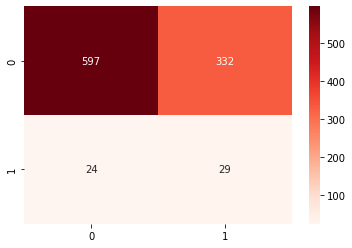

In [36]:
#create SVC classification obj
svc_obj = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svc = GridSearchCV(svc_obj, parameters)

#training via SVC classficiation model
svc.fit(X_train, y_train)

#make prediction using the test set
y_pred= svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap="Reds");

print(classification_report(y_test,y_pred))

### 4. Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       929
           1       0.11      0.47      0.18        53

    accuracy                           0.77       982
   macro avg       0.54      0.63      0.52       982
weighted avg       0.92      0.77      0.83       982



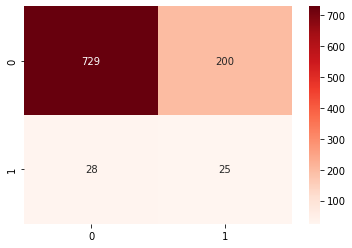

In [37]:
#create RandomForest classification obj
forest_obj = RandomForestClassifier()
parameters = {'n_estimators':[10, 20, 50, 100], 'max_depth':[2, 4, 6]}
forest = GridSearchCV(forest_obj, parameters)

#training via RandomForest classficiation model
forest.fit(X_train, y_train)

#make prediction using the test set
y_pred= forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap="Reds");

print(classification_report(y_test,y_pred))

### 5. Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.14      0.24       929
           1       0.06      1.00      0.12        53

    accuracy                           0.19       982
   macro avg       0.53      0.57      0.18       982
weighted avg       0.95      0.19      0.24       982



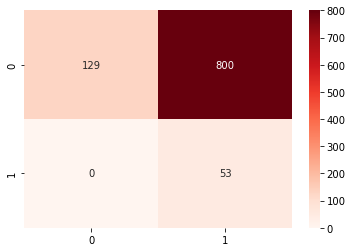

In [38]:
#create LogisticRegression classification obj
regression = LogisticRegression()

#training via LogisticRegression classficiation model
regression.fit(X_train, y_train)

#make prediction using the test set
y_pred= regression.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap="Reds");

print(classification_report(y_test,y_pred))

# Evaluation

According to accuracy, XGboost seems as best predictor model. But according to f1-scores, best model is random forest classifier with grad-searched parameters. Accuracy value can be misleading for unbalanced datasets. f1-score gives better insight such this situations.

**Best model:**  Random Forest Classifier ,  **f1-score:**  0.19, **Accuracy:** 0.79

# Conclusion

In this article, we took a look at stroke predictor factors according to Kaggle’s 2021 Stroke Prediction data.

1. We analyzed data for “stroke only old people’s problem” myth, which showed that although stroke is common in older patients, it is also seen in younger patients.
2. We then looked at the “people living in the city are at high risk of stroke” myth. The data showed us that there is no significant difference between the two groups.
3. Finally, we looked at the “smokers are more prone to stroke”. We found that, surprisingly, stroke is more prone in the group of non-smokers. This may be a biased assessment due to other factors.

In this study, we analyzed the causes of stroke and questioned three items that most of us misunderstood by the population. Our analysis may have been biased, as we had data for 5000 patients. The real question remains:

# My Medium blog post about data analysis of this project

**Data-Driven Analysis of Mythes About Stroke Causes**

https://medium.com/@sahika.betul/data-driven-analysis-of-mythes-about-stroke-causes-dd347899bba5